<h1 style="text-align: center; color: brown;"> model du Test Technique Data Engineer|Scientist</h1>
<h1 style="text-align: center; color: brown;">Déduplication des Annonces Immobilières à Levallois-Perret </h1>
<p style="text-align: center;"><strong>EL HADDIOUI AMINE</strong> - Data Scientist || ML Engineer</p>
<p style="text-align: center;">
  <a href="https://www.linkedin.com/in/amine-el-haddioui-junior-datascientist/">profile LinkedIn</a> |
  <a href="https://github.com/Amineelhaddioui">GitHub</a>
</p>

## Méthode de travail

Pour résoudre le problème de déduplication des annonces immobilières, j'ai suivi une approche basée sur la comparaison des descriptions des annonces. J'ai utilisé la bibliothèque fuzzywuzzy pour calculer la similarité entre les descriptions. Voici les étapes clés de ma méthode de travail :

1. Chargement des données.
2. Définition du seuil de similarité.
3. Comparaison des descriptions pour identifier les annonces similaires.
4. Création d'un identifiant de déduplication.
5. Filtrage des annonces dédoublonnées.


#  Setup des bibliothèques

In [147]:
#!pip install fuzzywuzzy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from fuzzywuzzy import fuzz  
from fuzzywuzzy import process

Chargez le jeu de données des annonces immobilières

In [129]:
data_imobilier=pd.read_csv("C:\\Users\\HP\\Desktop\\M1\\pfe\\Traffic_flow_prediction_master\\testimobilier\\Dataset_Ads_Levallois_Perret_2019_08.csv")

In [130]:
data_imobilier.head()

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,LAND_SURFACE,BALCONY_SURFACE,...,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,PUBLICATION_END_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE
0,22c05930-0eb5-11e7-b53d-bbead8ba43fe,http://www.avendrealouer.fr/location/levallois...,A_VENDRE_A_LOUER,APARTMENT,False,"Au rez de chaussée d'un bel immeuble récent,ap...","[""https://cf-medias.avendrealouer.fr/image/_87...",72.0,NaN,NaN,...,Lamirand Et Associes,AGENCY,54178039,Levallois-Perret,92300.0,92,2017-03-22T04:07:56.095,NaN,2017-04-21T18:52:35.733,NaN
1,8d092fa0-bb99-11e8-a7c9-852783b5a69d,https://www.bienici.com/annonce/ag440414-16547...,BIEN_ICI,APARTMENT,False,Je vous propose un appartement dans la rue Col...,"[""http://photos.ubiflow.net/440414/165474561/p...",48.0,NaN,NaN,...,Proprietes Privees,MANDATARY,54178039,Levallois-Perret,92300.0,92,2018-09-18T11:04:44.461,NaN,2019-06-06T10:08:10.89,2018-09-25
2,44b6a5c0-3466-11e9-8213-25cc7d9bf5fc,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,APARTMENT,False,"Dans un cadre arboré, calme et fleuri, un pent...","[""https://v.seloger.com/s/width/965/visuels/0/...",267.0,NaN,NaN,...,Propriétés Parisiennes,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-02-19T16:49:03.547,NaN,2019-06-13T08:22:14.314,NaN
3,e9e07ed0-812f-11e8-82aa-61eacebe4584,https://www.seloger.com/annonces/locations/bur...,SE_LOGER,PREMISES,False,"""Le meilleur coworking flexible de la ville, 5...","[""https://pix.yanport.com/ads/e9e07ed0-812f-11...",50.0,NaN,NaN,...,Iwg,AGENCY,54178039,Levallois-Perret,92300.0,92,2018-07-06T15:18:59.805,NaN,2019-06-18T10:40:07.405,NaN
4,872302b0-5a21-11e9-950c-510fefc1ed35,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,HOUSE,False,Levallois - Parc de la Planchette A toute prox...,"[""https://v.seloger.com/s/width/966/visuels/0/...",330.0,NaN,NaN,...,Daniel Feau Neuilly,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-08T17:12:20.123,NaN,2019-06-14T15:02:18.155,2019-06-14


In [131]:
len(data_imobilier)

2164

Identifiez les colonnes contenant des valeurs manquantes

In [132]:
data_imobilier.isnull().sum()

ID                               0
URL                              0
CRAWL_SOURCE                     0
PROPERTY_TYPE                    0
NEW_BUILD                      191
DESCRIPTION                      4
IMAGES                           0
SURFACE                        114
LAND_SURFACE                  2161
BALCONY_SURFACE               2164
TERRACE_SURFACE               2139
ROOM_COUNT                     329
BEDROOM_COUNT                 1468
BATHROOM_COUNT                2164
LUNCHROOM_COUNT               2164
TOILET_COUNT                  2164
FURNISHED                     1697
FIREPLACE                     2164
AIR_CONDITIONING              2164
GARDEN                        2150
SWIMMING_POOL                 2158
BALCONY                       2164
TERRACE                       2078
CELLAR                        2164
PARKING                          0
PARKING_COUNT                 2007
HEATING_TYPES                    0
HEATING_MODE                  1511
FLOOR               

 Informations générales sur le jeu de données

In [133]:
data_imobilier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2164 non-null   object 
 1   URL                         2164 non-null   object 
 2   CRAWL_SOURCE                2164 non-null   object 
 3   PROPERTY_TYPE               2164 non-null   object 
 4   NEW_BUILD                   1973 non-null   object 
 5   DESCRIPTION                 2160 non-null   object 
 6   IMAGES                      2164 non-null   object 
 7   SURFACE                     2050 non-null   float64
 8   LAND_SURFACE                3 non-null      float64
 9   BALCONY_SURFACE             0 non-null      float64
 10  TERRACE_SURFACE             25 non-null     float64
 11  ROOM_COUNT                  1835 non-null   float64
 12  BEDROOM_COUNT               696 non-null    float64
 13  BATHROOM_COUNT              0 non

In [134]:
data_imobilier.describe()

,SURFACE,LAND_SURFACE,BALCONY_SURFACE,TERRACE_SURFACE,ROOM_COUNT,BEDROOM_COUNT,BATHROOM_COUNT,LUNCHROOM_COUNT,TOILET_COUNT,FIREPLACE,...,GREENHOUSE_GAS_CONSUMPTION,PRICE,PRICE_M2,RENTAL_EXPENSES,DEPOSIT,FEES,CITY_ID,ZIP_CODE,DEPT_CODE,PUBLICATION_END_DATE
count,2050.000000,3.000000,0.0,25.000000,1835.000000,696.000000,0.0,0.0,0.0,0.0,...,0.0,2.104000e+03,1991.000000,441.000000,55.000000,94.000000,2164.0,2163.0,2164.0,0.0
mean,128.136068,30.000000,NaN,31.363600,2.243597,1.847701,NaN,NaN,NaN,NaN,...,NaN,4.261142e+05,5483.773420,406.687347,2988.506000,1531.935957,54178039.0,92300.0,92.0,NaN
std,423.339898,8.660254,NaN,57.467242,1.715621,1.104508,NaN,NaN,NaN,NaN,...,NaN,6.486603e+05,5384.760624,1329.451157,8071.172419,6269.065130,0.0,0.0,0.0,NaN
min,6.000000,25.000000,NaN,5.590000,0.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,3.300000e+01,1.780000,2.000000,70.000000,29.500000,54178039.0,92300.0,92.0,NaN
25%,36.200000,25.000000,NaN,13.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,1.600000e+03,32.375000,60.000000,860.500000,378.000000,54178039.0,92300.0,92.0,NaN
50%,55.000000,25.000000,NaN,18.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,2.200000e+05,7586.210000,100.000000,1350.000000,639.670000,54178039.0,92300.0,92.0,NaN
75%,93.000000,32.500000,NaN,26.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,...,NaN,6.097500e+05,10056.750000,151.000000,2450.000000,806.700000,54178039.0,92300.0,92.0,NaN
max,10287.000000,40.000000,NaN,300.000000,10.000000,8.000000,NaN,NaN,NaN,NaN,...,NaN,6.000000e+06,89000.000000,14287.330000,60000.000000,60000.000000,54178039.0,92300.0,92.0,NaN


In [136]:
#Traitement des valeurs manquantes 
date_columns = ['BEDROOM_COUNT', 'LAST_CRAWL_DATE','CONSTRUCTION_YEAR']
data[date_columns] =data[date_columns].fillna(data[date_columns].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13108\3941108315.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[date_columns] =data[date_columns].fillna(data[date_columns].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13108\3941108315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[date_columns] =data[date_columns].fillna(data[date_columns].mean(), inplace=True)


# Supprimer les colonnes inutiles

In [137]:
columns_to_drop = ["LAND_SURFACE","FEES_INCLUDED","RENTAL_EXPENSES_INCLUDED","LAST_PRICE_DECREASE_DATE","DEALER_NAME","OCCUPIED","CARETAKER","ELEVATOR","BALCONY_SURFACE","BATHROOM_COUNT","LUNCHROOM_COUNT","TOILET_COUNT","FIREPLACE","AIR_CONDITIONING","SWIMMING_POOL","BALCONY","CELLAR","ENERGY_CONSUMPTION","TERRACE","GREENHOUSE_GAS_CONSUMPTION","PUBLICATION_END_DATE","GARDEN","ZIP_CODE","DEPT_CODE","CITY_ID","TERRACE_SURFACE","CRAWL_SOURCE","HEATING_TYPES","HEATING_MODE","FLOOR_COUNT","MARKETING_TYPE","PRICE_EVENTS","EXCLUSIVE_MANDATE","AGENCIES_UNWANTED"]
data = data_imobilier.drop(columns=columns_to_drop,)
print(data.columns)

Index(['ID', 'URL', 'PROPERTY_TYPE', 'NEW_BUILD', 'DESCRIPTION', 'IMAGES',
       'SURFACE', 'ROOM_COUNT', 'BEDROOM_COUNT', 'FURNISHED', 'PARKING',
       'PARKING_COUNT', 'FLOOR', 'CONSTRUCTION_YEAR', 'PRICE', 'PRICE_M2',
       'RENTAL_EXPENSES', 'DEPOSIT', 'FEES', 'DEALER_TYPE', 'CITY',
       'PUBLICATION_START_DATE', 'LAST_CRAWL_DATE'],
      dtype='object')


In [138]:
# Remplir les valeurs manquantes des colonnes numériques avec la moyenne
numerical_columns = ['SURFACE', 'ROOM_COUNT', 'BEDROOM_COUNT', 'PARKING_COUNT', 'FLOOR', 'CONSTRUCTION_YEAR', 'PRICE', 'PRICE_M2', 'RENTAL_EXPENSES', 'DEPOSIT', 'FEES']

for column in numerical_columns:
    data[column].fillna(data[column].mean(), inplace=True)

In [140]:
date_columns = ['PUBLICATION_START_DATE', 'LAST_CRAWL_DATE','CONSTRUCTION_YEAR']
data[date_columns] = data[date_columns].apply(pd.to_datetime)
most_frequent_value = data['FURNISHED'].mode()[0]
data['FURNISHED'].fillna(most_frequent_value, inplace=True)
data['DESCRIPTION'].fillna('', inplace=True)
data['PARKING'].fillna(False, inplace=True)
data['NEW_BUILD'].fillna('Non spécifié', inplace=True)
data['CONSTRUCTION_YEAR'].fillna(pd.to_datetime('1900-01-01'), inplace=True)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      2164 non-null   object        
 1   URL                     2164 non-null   object        
 2   PROPERTY_TYPE           2164 non-null   object        
 3   NEW_BUILD               2164 non-null   object        
 4   DESCRIPTION             2164 non-null   object        
 5   IMAGES                  2164 non-null   object        
 6   SURFACE                 2164 non-null   float64       
 7   ROOM_COUNT              2164 non-null   float64       
 8   BEDROOM_COUNT           2164 non-null   float64       
 9   FURNISHED               2164 non-null   bool          
 10  PARKING                 2164 non-null   bool          
 11  PARKING_COUNT           2164 non-null   float64       
 12  FLOOR                   2164 non-null   float64 

# visualisations

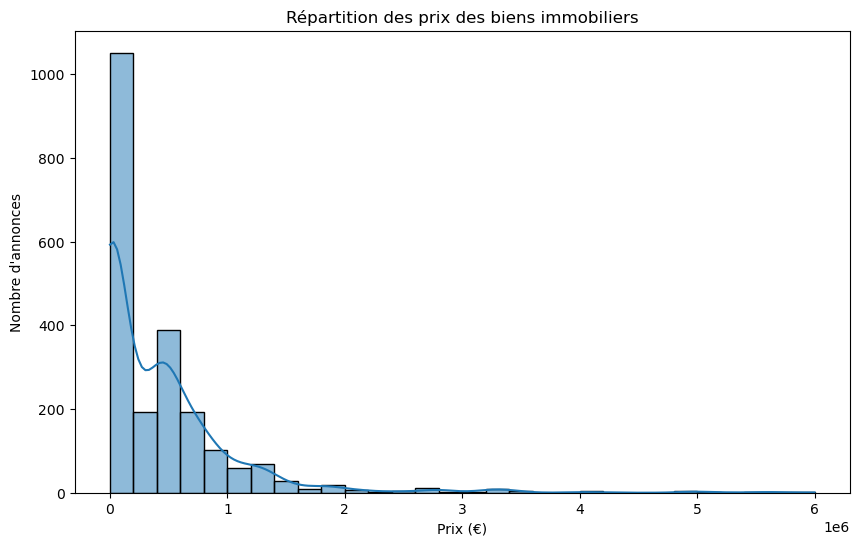

In [142]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='PRICE', bins=30, kde=True)
plt.title('Répartition des prix des biens immobiliers')
plt.xlabel('Prix (€)')
plt.ylabel('Nombre d\'annonces')
plt.show()


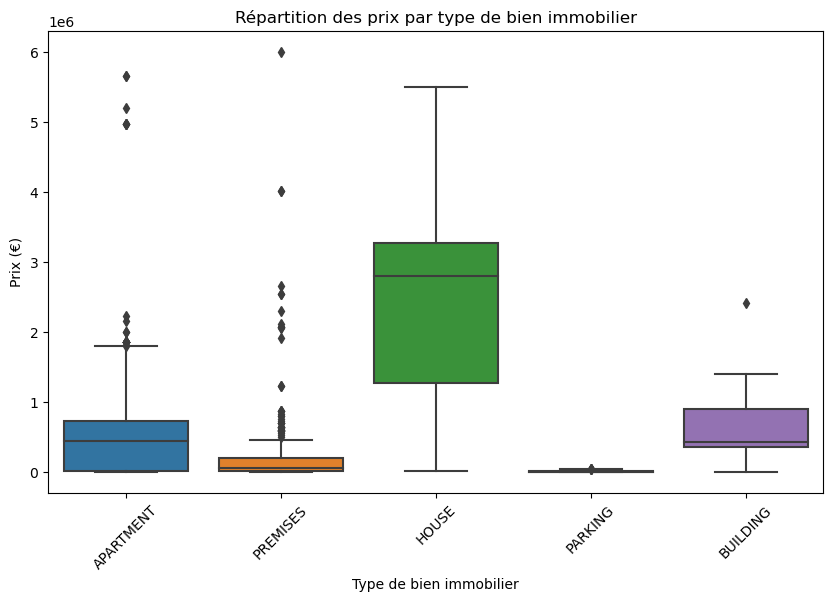

In [143]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='PROPERTY_TYPE', y='PRICE')
plt.xticks(rotation=45)
plt.title('Répartition des prix par type de bien immobilier')
plt.xlabel('Type de bien immobilier')
plt.ylabel('Prix (€)')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_13108\3547913649.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')


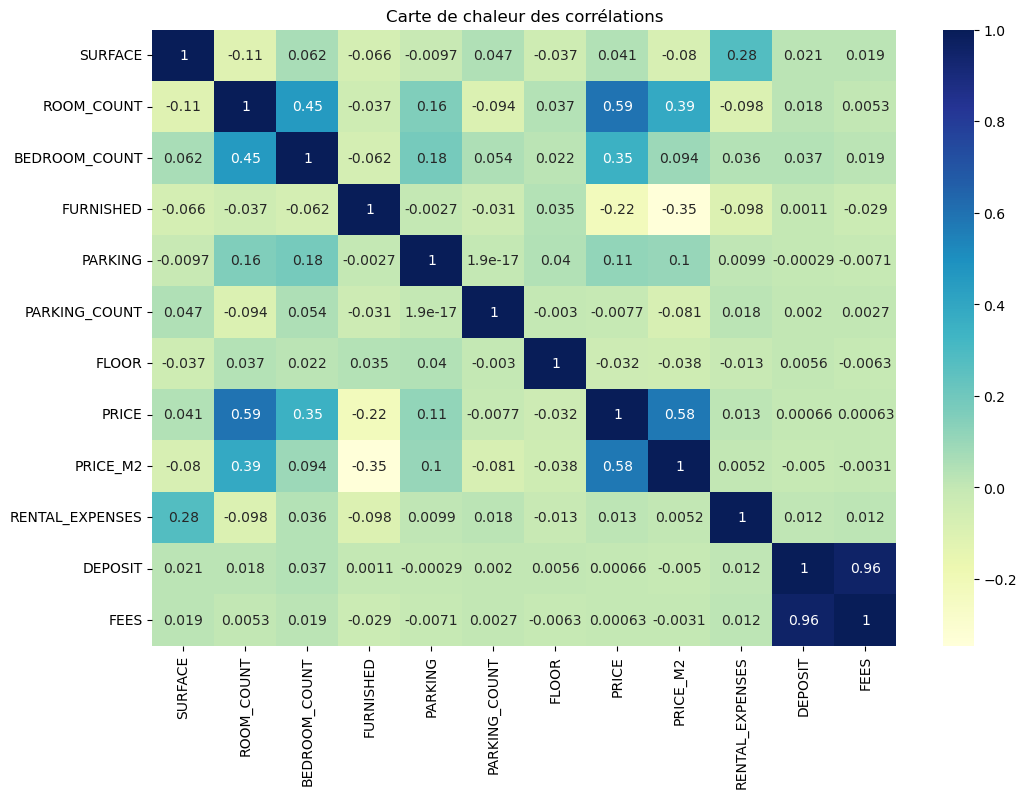

In [144]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.title('Carte de chaleur des corrélations')
plt.show()


# Déduplication des annonces immobilières

In [145]:
# Set the similarity threshold
seuil_similarite = 90

# Create a column to store deduplication IDs
data['DEDOUBLON_ID'] = None

# Iterate through each advertisement to identify duplicates
for i, row in data.iterrows():
    if data.loc[i, 'DEDOUBLON_ID'] is None:
        for j, row2 in data.iterrows():
            if i != j and data.loc[j, 'DEDOUBLON_ID'] is None:
                description1 = str(data.loc[i, 'DESCRIPTION'])  # Convert to string
                description2 = str(data.loc[j, 'DESCRIPTION'])  # Convert to string
                similarity = fuzz.ratio(description1, description2)
                if similarity >= seuil_similarite:
                    data.loc[j, 'DEDOUBLON_ID'] = data.loc[i, 'ID']

# Filter out deduplicated advertisements
data_clean = data.drop_duplicates(subset='DEDOUBLON_ID', keep='first')

# Remove the DEDOUBLON_ID column
data_clean = data_clean.drop(columns='DEDOUBLON_ID')

# Display the results
print(data_clean.head())


                                      ID  \
0   22c05930-0eb5-11e7-b53d-bbead8ba43fe   
57  efae7070-7dec-11e7-823a-7b6be8c2c3cd   
61  98631ba0-9513-11e9-bba5-076f63900c40   
67  b051ef00-a3f7-11e9-96d9-fb3253f8fc6c   
83  bdb34ab0-763c-11e9-8084-55ce2049f05c   

                                                  URL PROPERTY_TYPE  \
0   http://www.avendrealouer.fr/location/levallois...     APARTMENT   
57  https://www.seloger.com/annonces/achat/parking...       PARKING   
61  https://www.bienici.com/annonce/pericles-25678238     APARTMENT   
67  https://www.seloger.com/annonces/locations/app...     APARTMENT   
83  https://www.seloger.com/annonces/achat/apparte...     APARTMENT   

       NEW_BUILD                                        DESCRIPTION  \
0          False  Au rez de chaussée d'un bel immeuble récent,ap...   
57  Non spécifié  Places Georges Pompidou. Parking situé au 3ème...   
61         False  Levallois / Ile de la Jatte Dans un immeuble r...   
67         False  Flatlo

In [146]:
len(data_clean)

367

## Restitution des résultats

Vous pouvez télécharger les données nettoyées au format CSV en cliquant sur le lien ci-dessous :

Ces données peuvent maintenant être utilisées pour des analyses futures, des visualisations ou d'autres besoins liés à l'immobilier.


In [151]:
from IPython.display import HTML

# Sauvegardez les résultats dans un fichier CSV
data_clean.to_csv("annonces_immobilieres_dedupliquee.csv", index=False)

# Créez un lien de téléchargement
csv_link = f'<a href="annonces_immobilieres_dedupliquee.csv" download="annonces_immobilieres_dedupliquee.csv">Télécharger le fichier CSV</a>'

# Affichez le lien
HTML(csv_link)
